In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor 


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, TomekLinks

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)
warnings.simplefilter(action = 'ignore', category = RuntimeWarning)

In [5]:
data = pd.read_csv(r'C:\Users\user\Desktop\Github\Hotel booking prediction\hotel-booking-prediction\data\cleaned_data.csv')

In [119]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_year,reservation_month,reservation_day,reservation_weekday
0,Resort Hotel,0,342,1,0,0,2,0.0,0,BB,...,C,No Deposit,Transient,0.0,0,0,2015,7,1,2
1,Resort Hotel,0,737,1,0,0,2,0.0,0,BB,...,C,No Deposit,Transient,0.0,0,0,2015,7,1,2
2,Resort Hotel,0,7,1,0,1,1,0.0,0,BB,...,A,No Deposit,Transient,75.0,0,0,2015,7,2,3
3,Resort Hotel,0,13,1,0,1,1,0.0,0,BB,...,A,No Deposit,Transient,75.0,0,0,2015,7,2,3
4,Resort Hotel,0,14,1,0,2,2,0.0,0,BB,...,A,No Deposit,Transient,98.0,0,1,2015,7,3,4


#### One hot-encoding and label encoding

In [6]:
dummies_columns = data.select_dtypes('object').columns

In [7]:
dummies_columns

Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type'],
      dtype='object')

In [8]:
data = pd.get_dummies(data, columns=dummies_columns, drop_first=True, dtype=int)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108683 entries, 0 to 118727
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     108683 non-null  int64  
 1   lead_time                       108683 non-null  int64  
 2   arrival_date_day_of_month       108683 non-null  int64  
 3   stays_in_weekend_nights         108683 non-null  int64  
 4   stays_in_week_nights            108683 non-null  int64  
 5   adults                          108683 non-null  int64  
 6   children                        108683 non-null  float64
 7   babies                          108683 non-null  int64  
 8   is_repeated_guest               108683 non-null  int64  
 9   previous_cancellations          108683 non-null  int64  
 10  previous_bookings_not_canceled  108683 non-null  int64  
 11  adr                             108683 non-null  float64
 12  required_car_parking_

In [128]:
list(data.columns)

['is_canceled',
 'lead_time',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_year',
 'reservation_month',
 'reservation_day',
 'reservation_weekday',
 'hotel_Resort Hotel',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'reserved_room_type_B',
 'reserved_room_type_C',
 'reserved_room_type_D',
 'reserved_room_type_E',
 'reserved_room_type_F',
 'reserved_room_type_G',
 'reserved_room_type_H',
 'reserved_room_type_L',
 'deposit_type_Non Refund',
 '

In [113]:
data.head()

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,1,0,0,2,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,737,1,0,0,2,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,7,1,0,1,1,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,13,1,0,1,1,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,1,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
X = data.drop(columns=['is_canceled', 'adr'])
y_classif = data['is_canceled']
y_reg = data['adr']

In [71]:
def best_pipeline (X, y , models:list, sample_methods:list, scoring_type:str, n:int):
    
    
    pipe = Pipeline([
        ('select_k_best', SelectKBest(score_func=f_classif, k=n)),
        ('sampling', SMOTE()),  # Placeholder
        ('model', RandomForestClassifier())  # Placeholder
    ])
        

    params = [{
        "model": models,
        "sampling":sample_methods
    }]


    CV= GridSearchCV(pipe, params,scoring = scoring_type, verbose = 1, cv = 5, n_jobs = -1,)
    CV.fit(X,y)
    
    #total elapsed time
    mean_fit_time= CV.cv_results_['mean_fit_time']
    mean_score_time= CV.cv_results_['mean_score_time']
    n_iter = pd.DataFrame(CV.cv_results_).shape[0] #Iterations per split

    
    best_score = CV.best_score_
    best_estimator = CV.best_estimator_
    
    print("Total elapsed time (mins): ", round(np.mean(mean_fit_time + mean_score_time) * n_iter/60,4))
    print("#"*50)
    print("Best score is: ", round(best_score,4))
    print("#"*50)
    print("Best estimator : ",best_estimator)

    #Creating a dataframe with the scores of each pipeline
    df_results = pd.DataFrame(CV.cv_results_)
    
    df_scores = pd.DataFrame(columns=["full_model", "score", "rank" ,"model", "sampling","params"])
    df_scores["params"] = df_results["params"]
    df_scores["score"] = df_results["mean_test_score"]
    df_scores["rank"] = df_results["rank_test_score"]
    df_scores["model"] = df_scores["params"].apply(lambda x: str(x["model"]))  
    df_scores["sampling"] = df_scores["params"].apply(lambda x: str(x["sampling"]))
    df_scores["full_model"] = df_scores["model"]+"||"+df_scores["sampling"]
   
    df_scores.drop(columns="params",inplace=True)
    df_scores = df_scores.sort_values(by='score', ascending=False)
    
   

    #Access the SelectKBest step from the pipeline
    select_k_best = best_estimator.named_steps['select_k_best']

    #Get a boolean mask of the selected features
    feature_mask = select_k_best.get_support()

    selected_features = X.columns[feature_mask]
    print("Selected features:", selected_features)

    #Barplot
    plt.figure(figsize=(8,8))
    ax = sns.barplot(x='score', y="full_model", 
                     data=df_scores, palette='pastel')
    
    for container in ax.containers:
        ax.bar_label(container, label_type='center')
    
    plt.show()
    
    return df_scores

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Total elapsed time (mins):  0.7999
##################################################
Best score is:  0.5896
##################################################
Best estimator :  Pipeline(steps=[('select_k_best', SelectKBest(k=20)), ('sampling', SMOTE()),
                ('model', RandomForestClassifier(random_state=42))])
Selected features: Index(['lead_time', 'adults', 'previous_cancellations',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_year', 'reservation_month', 'reservation_day',
       'reservation_weekday', 'hotel_Resort Hotel', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'distribution_channel_Direct',
       'distribution_channel_TA/TO', 'reserved_room_type_D',
       'deposit_type_Non Refund', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object')


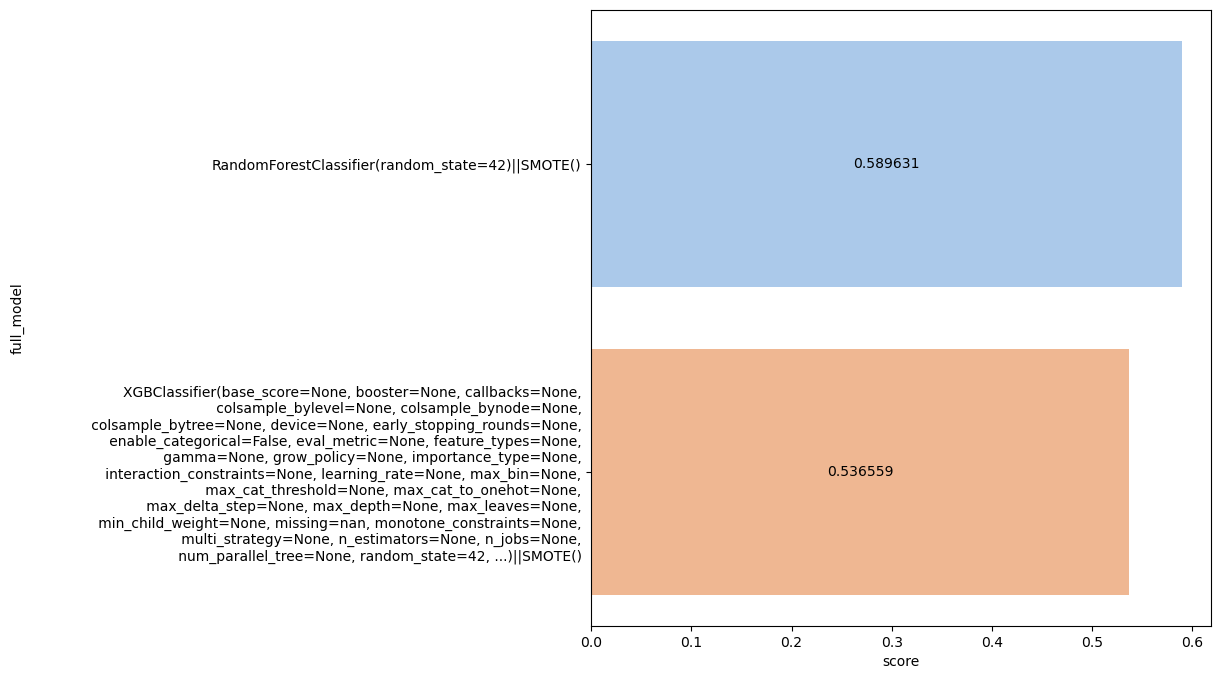

,full_model,score,rank,model,sampling
1,RandomForestClassifier(random_state=42)||SMOTE(),0.589631,1,RandomForestClassifier(random_state=42),SMOTE()
0,"XGBClassifier(base_score=None, booster=None, c...",0.536559,2,"XGBClassifier(base_score=None, booster=None, c...",SMOTE()


In [83]:
model_list=[XGBClassifier(random_state=42), RandomForestClassifier(random_state=42)]
samples = [SMOTE()]

best_pipeline (X, y_classif , model_list, samples, scoring_type="accuracy", n=20)

In [10]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X, y_classif, shuffle=True, test_size=0.3)

In [88]:
# Create the pipeline
pipeline = Pipeline([
    ('select_k_best', SelectKBest(score_func=f_classif)),
    ('model', RandomForestClassifier(random_state=42))
])


param_grid = {
    'select_k_best__k': [5, 10, 20, 30],  # Try different numbers of features
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [5, 10],
    'model__min_samples_split': [2, 5, 10],
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV on training data
grid_search.fit(X_train_cl, y_train_cl)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test_cl, y_test_cl)
print("Test set accuracy:", test_score)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100, 'select_k_best__k': 20}
Best cross-validation accuracy: 0.8264259475007087
Test set accuracy: 0.825529525532645


In [138]:
# Updated pipeline: feature selection -> SMOTE -> model
pipeline_smote = Pipeline([
    ('select_k_best', SelectKBest(score_func=f_classif, k=20)),
    ('sampling', SMOTE()),
    ('model', RandomForestClassifier(random_state=42))
])

# Use the same parameter grid that gave the best results before,
param_grid = {
    'model__max_depth': [10],
    'model__min_samples_split': [5],
    'model__n_estimators': [100],
}

# Setup GridSearchCV with the updated pipeline
grid_search_smote = GridSearchCV(pipeline_smote, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV on training data
grid_search_smote.fit(X_train_cl, y_train_cl)

# Best parameters and scores
print("Best parameters:", grid_search_smote.best_params_)
print("Best cross-validation accuracy:", grid_search_smote.best_score_)

# Evaluate on the test set
test_score_smote = grid_search_smote.score(X_test_cl, y_test_cl)
print("Test set accuracy:", test_score_smote)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best cross-validation accuracy: 0.8244739534049039
Test set accuracy: 0.8229403874348816


In [11]:
# Build a pipeline with feature selection, SMOTE, and CatBoostClassifier

pipeline_catboost = Pipeline([
    ('select_k_best', SelectKBest(score_func=f_classif, k=20)),
    ('sampling', SMOTE()),
    ('model', CatBoostClassifier(random_state=42, verbose=0))
])

# Define a parameter grid for CatBoost
param_grid_cat = {
    'model__depth': [6, 8, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__iterations': [100, 200]
}

# Setup GridSearchCV with the CatBoost pipeline
grid_search_cat = GridSearchCV(pipeline_catboost, param_grid_cat, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV on training data
grid_search_cat.fit(X_train_cl, y_train_cl)

# Best parameters and score
print("Best parameters:", grid_search_cat.best_params_)
print("Best cross-validation accuracy:", grid_search_cat.best_score_)

# Evaluate on the test set
test_score_cat = grid_search_cat.score(X_test_cl, y_test_cl)
print("Test set accuracy:", test_score_cat)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'model__depth': 10, 'model__iterations': 200, 'model__learning_rate': 0.2}
Best cross-validation accuracy: 0.8630578751260576
Test set accuracy: 0.8663318463986025


In [ ]:
# Names of the 20 best columns

selector = SelectKBest(score_func = f_classif)
fit  = selector.fit(X,y_classif)

df_scores = pd.DataFrame(selector.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns=["Specs", "Score"]
best_k_cols = feature_scores.nlargest(20,"Score")["Specs"].values

In [15]:
best_k_cols

array(['deposit_type_Non Refund', 'lead_time',
       'total_of_special_requests', 'market_segment_Groups',
       'reservation_weekday', 'customer_type_Transient',
       'required_car_parking_spaces', 'distribution_channel_TA/TO',
       'market_segment_Direct', 'customer_type_Transient-Party',
       'distribution_channel_Direct', 'previous_cancellations',
       'hotel_Resort Hotel', 'reservation_year', 'reservation_month',
       'adults', 'market_segment_Corporate', 'reserved_room_type_D',
       'market_segment_Offline TA/TO', 'is_repeated_guest'], dtype=object)

In [18]:
# Create a pipeline without SelectKBest to use it in production

pipeline_no_feature_sel = Pipeline([
    ('sampling', SMOTE()),
    ('model', CatBoostClassifier(random_state=42, depth=10, iterations=200, learning_rate=0.2, verbose=0))
])

# Use only best_k_cols:
X_reduced = X[best_k_cols]
pipeline_no_feature_sel.fit(X_reduced, y_classif)

Pipeline(steps=[('sampling', SMOTE()),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x00000203FE7E20D0>)])

In [19]:
path = r"C:\Users\user\Desktop\Github\Hotel booking prediction\hotel-booking-prediction\models\catboost_model.pkl"
joblib.dump(value=[best_k_cols,pipeline_no_feature_sel], filename=path) 

['C:\\Users\\user\\Desktop\\Github\\Hotel booking prediction\\hotel-booking-prediction\\models\\catboost_model.pkl']